<span style="font-family:Times; font-size:3em; ">
        <div class="alert alert-success">
            <span style="color:blue">
               <center>Srijesh_Homework_Week_3<br><br> >>  Binary Classification  << <br><br> >>  Visualizing the Confusion Matrix  << </center>
            </span>
         </div>
    </span>

<span style="font-family:Times; font-size:1.5em; ">
  <div class="alert alert-info" role="alert">
    <span style="color:blue">
      Most of this Notebook comes from your textbook author's Chapter 3 text and the Chapter 3 Notebook. To understand what is going on, you should follow along in your textbook as run cells in this Notebook. <br><br> The homework question is at the bottom of this Notebook. Answering it is worth 25 points.
    </span>
  </div>
</span>



<span style="font-size:1.5em;">
    <br>
<div class="alert alert-danger" role="alert">
    <center> >>> NOTE <<<  
    
 <div class="alert alert-danger" role="alert">   <span style="font-size:0.8em;">
        Some of the cells in this Notebook begin with <font color=blue><b>%%time</b></font> to time their execution.<br> Typically, I put <font color=blue><b>%%time</b></font> in cells that can take many seconds or a few minutes to run so you know to be patient!<br></center>
</div>

--- 



In [8]:
# This records when you started running this Notebook
import time
start = time.time()

# Student Information

<span style="font-size:1.8em;">
   
<div class="alert alert-danger" role="alert">
    <center>
    
 <div class="alert alert-danger" role="alert">   <span style="font-size:0.8em;">
     Note in the following cell the instuctions to <b>add your name</b><br></center>
</div>


In [9]:
# Edit to add your name.  Also, change this Notebook's filename to include your name.

My_Name = "srijesh reddy yarram"
print(My_Name)

srijesh reddy yarram


In [10]:
import datetime as dt  
dt.datetime.today().strftime("%m/%d/%Y %H:%M:%S %p")

'11/13/2022 10:33:07 AM'

In [11]:
import sys
print(sys.executable)
print()
print(sys.version)
print()
print(sys.version_info)
print()
print(sys.platform)

/Users/srijesh/opt/anaconda3/envs/tf2/bin/python

3.9.13 (main, Oct 13 2022, 16:12:30) 
[Clang 12.0.0 ]

sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)

darwin


In [12]:
import platform
platform.platform()

'macOS-10.14.6-x86_64-i386-64bit'

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [13]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST

**Warning:** since Scikit-Learn 0.24, `fetch_openml()` returns a Pandas `DataFrame` by default. To avoid this and keep the same code as in the textbook, we use `as_frame=False`.

**Note:** the following cell can take up to a `few minutes` to run!

In [14]:
%%time

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

CPU times: user 18.5 s, sys: 467 ms, total: 19 s
Wall time: 19.3 s


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [15]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [16]:
y.shape

(70000,)

In [17]:
28 * 28

784

In [18]:
y[0]

'5'

In [19]:
# So what does the data look like? Lets peek and the first digit:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Saving figure some_digit_plot


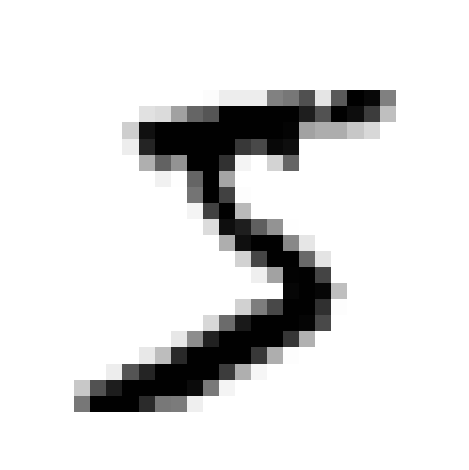

In [20]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")

# Now, lets see it
plt.show()

In [21]:
y[0]

'5'

In [22]:
y = y.astype(np.uint8)  # cast y from string to number

In [23]:
y.dtype

dtype('uint8')

In [24]:
y[0]

5

In [25]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [26]:
# EXTRA Plotting example
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


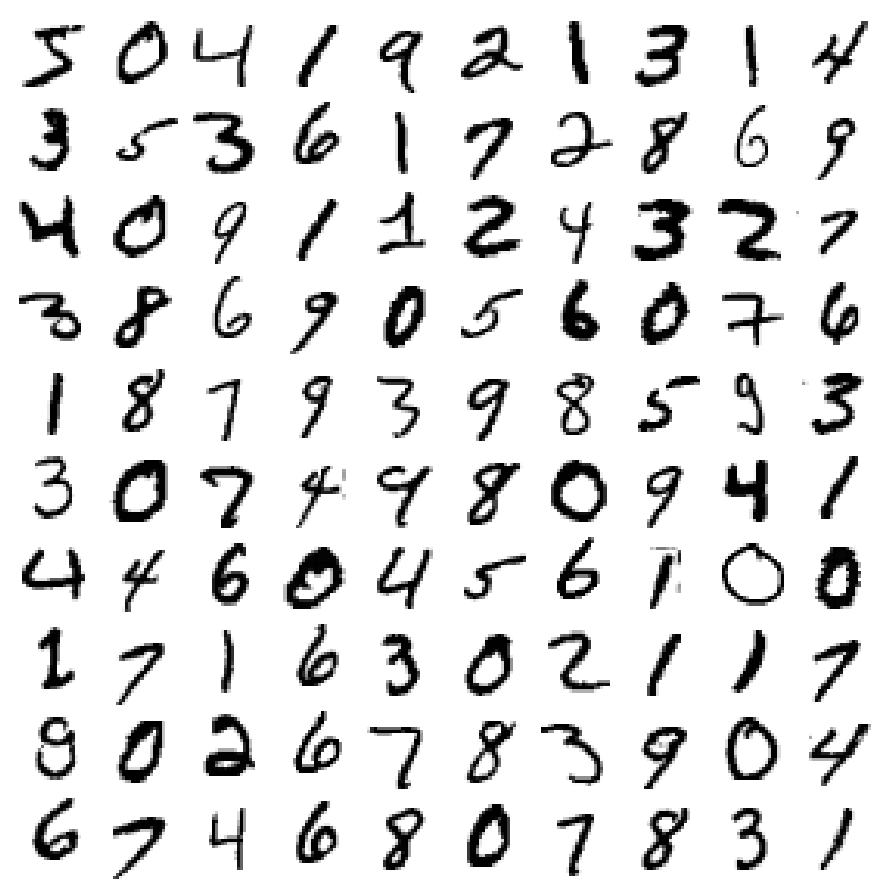

In [27]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [28]:
y[0]

5

In [29]:
#Lets confirm that, say, the "4" on the end of the first row is at index 9
y[9]

4

In [30]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Binary classifier

In [31]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

#### What does y_train_5 look like? Then, lets see the fist 10 values

In [32]:
y_train_5.shape

(60000,)

In [33]:
y_train_5[0:10]  # look at the first 10 elements of the array

array([ True, False, False, False, False, False, False, False, False,
       False])

### From the above, I see that the 1st array item is True (must be a 5), so I plot it.  NOTE: Arrays start index a 0, so 1st array element is index 0 not 1!

Saving figure some_digit_plot


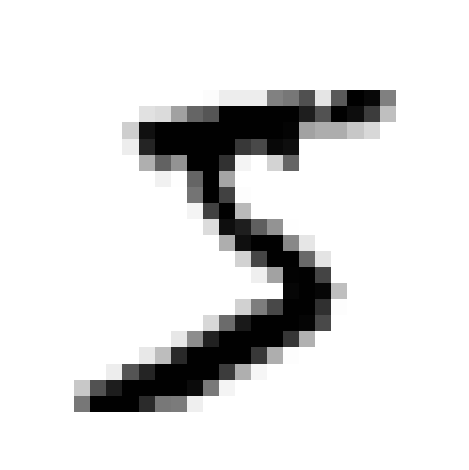

In [34]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [35]:
y[0]

5

#### I also noticed in the Grid plot of digits a few cells above, another 5 at array element 11.  Lets check that out to confirm our understanding

Saving figure some_digit_plot


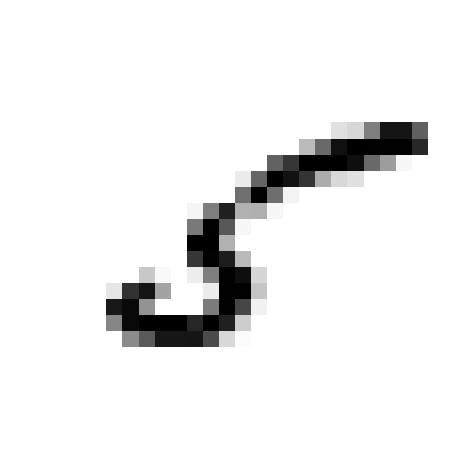

In [36]:
some_digit = X[11]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")

plt.show()

In [37]:
 # Array elelment should be 5 (looks a bit like a 6, but lets confirm it is a 5 according to the dataset)
    
y[11]   

5

---

**Note**: some hyperparameters will have a different defaut value in future versions of Scikit-Learn, such as `max_iter` and `tol`. To be future-proof, we explicitly set these hyperparameters to their future default values. For simplicity, this is not shown in the book.

In [38]:
%%time 

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

CPU times: user 17.3 s, sys: 830 ms, total: 18.2 s
Wall time: 21 s


SGDClassifier(random_state=42)

In [39]:
sgd_clf.predict([some_digit])

array([ True])

In [40]:
%%time

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

CPU times: user 23.5 s, sys: 551 ms, total: 24 s
Wall time: 27.1 s


array([0.95035, 0.96035, 0.9604 ])

**Note**: In the next cell, `shuffle=True` in StratifiedKFold() was omitted by mistake in previous releases of the book.

In [45]:
%%time

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785
CPU times: user 28.2 s, sys: 427 ms, total: 28.6 s
Wall time: 29.3 s


In [46]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [47]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [48]:
%%time

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

CPU times: user 22.8 s, sys: 304 ms, total: 23.1 s
Wall time: 23.6 s


## Plot the Confusion Matrix (CM)

### Compute the CM

In [49]:
%%time

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)

cm

CPU times: user 11.9 ms, sys: 9.79 ms, total: 21.7 ms
Wall time: 35.7 ms


array([[53892,   687],
       [ 1891,  3530]])

### Create a plotting function to plot the CM variable 

In [50]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

###  We used Binary Classification on 5 and non-5, so that will be our labels

Confusion matrix, without normalization
[[53892   687]
 [ 1891  3530]]


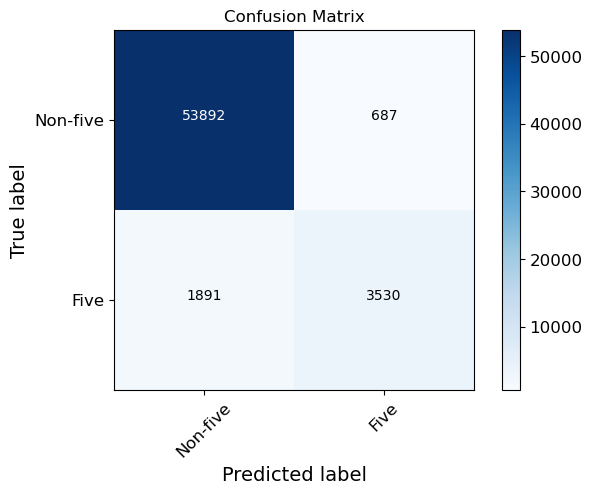

In [51]:
cm_plot_labels = ['Non-five','Five']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### The Confusion Matrix is easier to understand when plotted!

---

In [52]:
dt.datetime.today().strftime("%m/%d/%Y %H:%M:%S %p")

'11/13/2022 10:39:02 AM'

In [53]:
print("This Jupyter Notebook was run by:",My_Name)

This Jupyter Notebook was run by: srijesh reddy yarram


In [54]:
#Lets see the running time:

end = time.time()
print("Run time in seconds:",end - start)

Run time in seconds: 366.24379801750183


In [55]:
# I likely need to install the package 'version_information' before I use it
!pip install version_information

In [56]:
!pip show version_information

Name: version-information
Version: 1.0.4
Summary: Version information:
Home-page: https://github.com/jrjohansson/version_information
Author: J. Robert Johansson
Author-email: jrjohansson@gmail.com
License: BSD
Location: /Users/srijesh/opt/anaconda3/lib/python3.9/site-packages
Requires: 
Required-by: 


<span style="font-family:Times; font-size:1.5em; ">
  <div class="alert alert-info" role="alert">
    
  </div>
</span>



<span style="font-family:Times; font-size:2.5em; ">
 <div class="alert alert-warning">
     <br>
    <center> Homework Questions (25 Points)</center>
     <br>
 </div>
</span>

### [25 points] Copy (some) of the above cells and paste below to: 
* Create a new dataset selection with another digit (i.e., <b>not</b> 5).
* Run a Binary Classification for your digit.
* Compute the Confusion Matrix.
* Plot the Confusion Matrix with correct labels for the number you selected. <br><br>

Submit your completed Notebook (be sure to add your name to the filename) in Canvas. <br><br>
\[HINT: Copy code cells from above example. Use all the same variable names. Just change some of the numeric values. You should NOT need to develop any new code!\]
<BR>


In [59]:
y_train_4 = (y_train == 4)  # True for all 4s, False for all other digits
y_test_4 = (y_test == 4)

In [60]:
y_train_4.shape

(60000,)

In [62]:
y_train_4[0:10]  # look at the first 10 elements of the array

array([False, False,  True, False, False, False, False, False, False,
        True])

Saving figure some_digit_plot


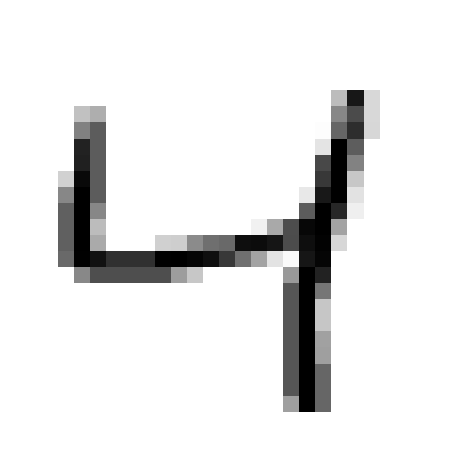

In [64]:
some_digit = X[2]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [66]:
y[2]

4

Saving figure some_digit_plot


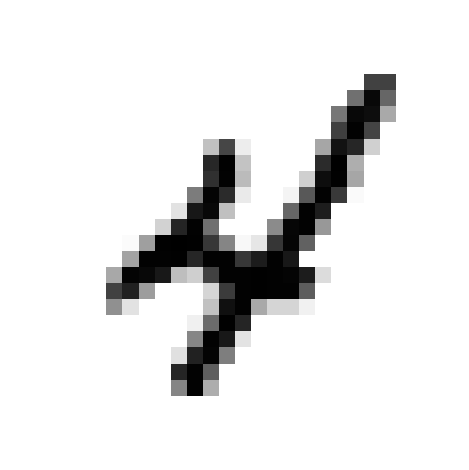

In [67]:
some_digit = X[9]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")

plt.show()

In [68]:
y[9]  

4

In [69]:
%%time 

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_4)

CPU times: user 14 s, sys: 669 ms, total: 14.7 s
Wall time: 15.2 s


SGDClassifier(random_state=42)

In [70]:
sgd_clf.predict([some_digit])

array([ True])

In [71]:
%%time

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_4, cv=3, scoring="accuracy")

CPU times: user 19.8 s, sys: 461 ms, total: 20.3 s
Wall time: 21.3 s


array([0.9671 , 0.97645, 0.9687 ])

In [72]:
%%time

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_4):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_4[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_4[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9787
0.97745
0.97375
CPU times: user 19.3 s, sys: 428 ms, total: 19.8 s
Wall time: 19.9 s


In [73]:
from sklearn.base import BaseEstimator
class Never4Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [74]:
never_4_clf = Never4Classifier()
cross_val_score(never_4_clf, X_train, y_train_4, cv=3, scoring="accuracy")

array([0.90275, 0.9018 , 0.90335])

In [75]:
%%time

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_4, y_train_pred)

cm

CPU times: user 8.54 ms, sys: 3.3 ms, total: 11.8 ms
Wall time: 14.2 ms


array([[49962,  4196],
       [ 5821,    21]])

In [76]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[49962  4196]
 [ 5821    21]]


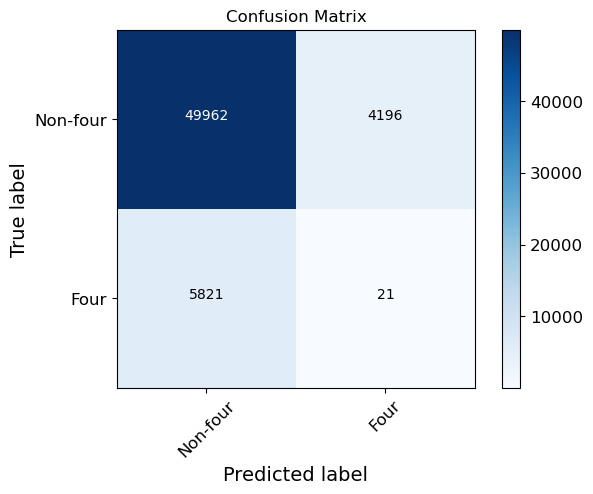

In [77]:
cm_plot_labels = ['Non-four','Four']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')